Q1. What is anomaly detection and what is its purpose?

Q2. What are the key challenges in anomaly detection?

Q3. How does unsupervised anomaly detection differ from supervised anomaly detection?

Q4. What are the main categories of anomaly detection algorithms?

Q5. What are the main assumptions made by distance-based anomaly detection methods?

Q6. How does the LOF algorithm compute anomaly scores?

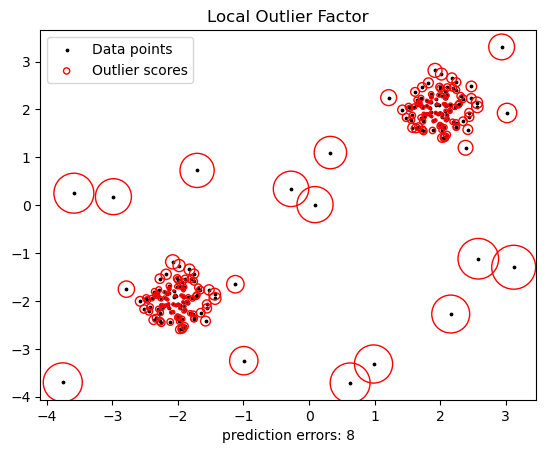

In [46]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor")
plt.show()

Q7. What are the key parameters of the Isolation Forest algorithm?

Q8. If a data point has only 2 neighbours of the same class within a radius of 0.5, what is its anomaly score using KNN with K=10?

In [39]:
Actual_k = 2
Expected_k = 10

In [40]:
Anomaly_Score = 1 - (Actual_k/Expected_k)

In [41]:
Anomaly_Score

0.8

CONCLUSION: This high anomaly score shows that the data point is very likely to be an outlier in the context of the dataset.

Q9. Using the Isolation Forest algorithm with 100 trees and a dataset of 3000 data points, what is the anomaly score for a data point that has an average path length of 5.0 compared to the average path length of the trees?

In [42]:
import numpy as np
from scipy.special import digamma

def harmonic_number(n):
    return digamma(n + 1) + np.euler_gamma

def expected_path_length(n):
    if n <= 1:
        return 0
    return 2 * harmonic_number(n - 1) - (2 * (n - 1) / n)

def anomaly_score(path_length, n):
    c_n = expected_path_length(n)
    return 2 ** (-path_length / c_n)

# Parameters
n = 3000
path_length = 5.0

# Calculate anomaly score
score = anomaly_score(path_length, n)
print(f"The anomaly score is: {score}")

The anomaly score is: 0.7957282801307705
